## 정적 크롤링 모듈

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

- 요처모듈로 가져온 HTML 코드를 파이썬이 쓸 수 있는 형태로 변환해 주는 역할

In [2]:
url = 'https://www.naver.com'

page = urlopen(url)

soup = BeautifulSoup(page, 'lxml')

<!DOCTYPE html>
<html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:
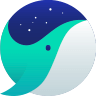
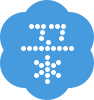

In [3]:
print(soup)

### 파서

- 내가 원하는 데이터를 특정 패턴이나 순서로 추출하여 정보를 가공해 주는 프로그램 ('lxml'도 파서 중 하나)
    - lxml
        - c언어로 구현되어 속도가 가장 빠르다
    - html5lib
        - 웹브라우저 형태로 HTML을 분석
        - 속도가 가장 느림
        - 가장 안정적
    - html.parser
        - lxml과 html5lib의 중간 속도

In [4]:
import time

In [6]:
S = time.time()
BeautifulSoup(page, 'lxml')

lxml_time = time.time() - S
###############################################################
S = time.time()
BeautifulSoup(page, 'html.parser')

html_parser_time = time.time() - S
####################################################
S = time.time()
BeautifulSoup(page, 'html5lib')

html5lib_time = time.time() - S

print(f'lxml 시간 측정 : {lxml_time}초')
print(f'html.parser 시간 측정 : {html_parser_time} 초')
print(f'html5lib 시간 측정 : {html5lib_time} 초')


lxml 시간 측정 : 0.0009610652923583984초
html.parser 시간 측정 : 0.0 초
html5lib 시간 측정 : 0.0010259151458740234 초


In [7]:
%%timeit

BeautifulSoup(page, 'html.parser')

41.5 µs ± 285 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [8]:
%%timeit

BeautifulSoup(page, 'html5lib')

118 µs ± 499 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
%%timeit

BeautifulSoup(page, 'lxml')

58.7 µs ± 632 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
type(soup)

bs4.BeautifulSoup

<!DOCTYPE html>
<html data-dark="false" lang="ko">
 <head>
  <meta charset="utf-8"/>
  <title>
   NAVER
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=1190" name="viewport"/>
  <meta content="NAVER" name="apple-mobile-web-app-title"/>
  <meta content="index,nofollow" name="robots"/>
  <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/>
  <meta content="네이버" property="og:title"/>
  <meta content="https://www.naver.com/" property="og:url"/>
  <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
  <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/>
  <meta content="summary" name="twitter:card"/>
  <meta content="" name="twitter:title"/>
  <meta content="https://www.naver.com/" name="twitter:url"/>
  <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/>
  <meta content="네이버 메인에서
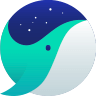
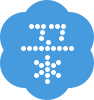

In [11]:
# html을 예쁘게 출력
print(soup.prettify())

### 속성 데이터